In [1]:
from sklearn.linear_model import LinearRegression
import numpy
import matplotlib.pyplot as pyplot
from scipy.optimize import minimize
import pandas

def Ln(x):
    return numpy.log(x)

In [2]:
def modelo_lineal(X, beta_0, beta_1):
    return beta_0 + beta_1*x

def negativa_logverosimilitud(parametros, y_observada, X):
    beta_0, beta_1, sigma = parametros
    y_predicha = modelo_lineal(X, beta_0, beta_1)
    nll = -numpy.sum( Ln(1/(numpy.sqrt(2*numpy.pi)*sigma)) - 0.5*((y_observada-y_predicha)/sigma)**2)
    return nll

Text(0, 0.5, 'Y')

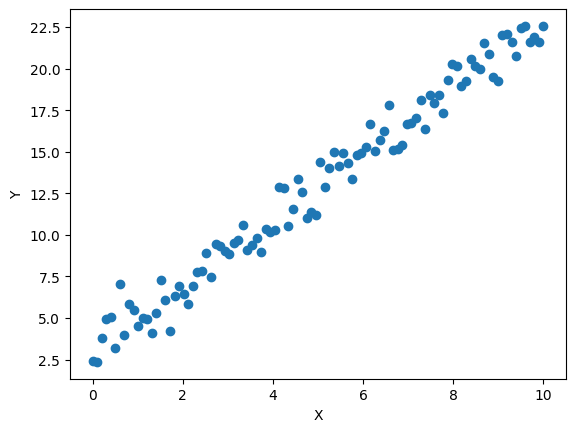

In [3]:
numpy.random.seed(297974)
num_muestras = 100
x = numpy.linspace(0, 10, num_muestras)
sigma = 1
beta_0_real = 3
beta_1_real = 2
ypsilon = numpy.random.normal(0, sigma, num_muestras)
y_observada = beta_0_real + beta_1_real*x + ypsilon

pyplot.scatter(x, y_observada)
pyplot.xlabel("X")
pyplot.ylabel("Y")

In [6]:
X0 = [0,0,3]
resultao = minimize(negativa_logverosimilitud, X0, args=(y_observada,x), method="L-BFGS-B", bounds=[(None, None), (None, None), (0.01, None)])
resultao

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 133.65619988766315
        x: [ 3.018e+00  1.982e+00  9.209e-01]
      nit: 16
      jac: [ 2.103e-04  1.714e-03  4.547e-05]
     nfev: 96
     njev: 24
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

In [9]:
numero_simulaciones = 500
b0_real = 3
b1_real = 1
sigma = 1
pendientes = []
ordenadas = []
x = numpy.linspace(0, 10, num_muestras)

for i in range(numero_simulaciones):
    ypsilon = numpy.random.normal(0, sigma, 100)
    y_obs = b0_real + b1_real*x + ypsilon
    resultao = minimize(negativa_logverosimilitud, X0, args=(y_obs, x,), method="L-BFGS-B", bounds=[(None, None), (None, None), (0.0001, None)])
    b0gorrito, b1gorrito, sigmagorrito = resultao.x
    ordenadas.append(b0gorrito)
    pendientes.append(b1gorrito)

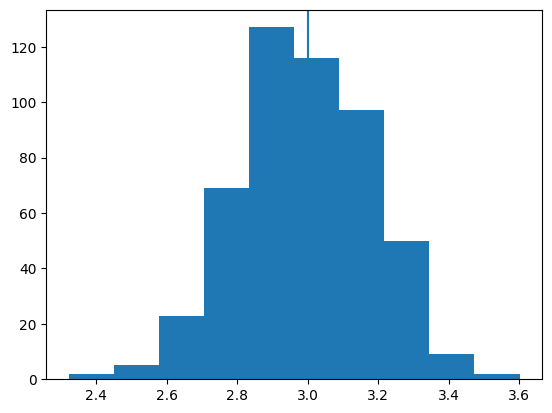

In [11]:
pyplot.hist(ordenadas)
pyplot.axvline(b0_real)

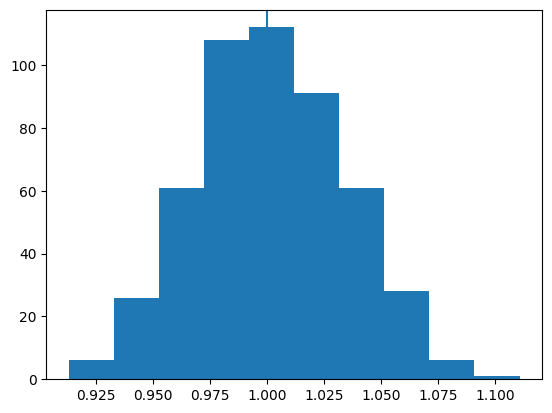

In [12]:
pyplot.hist(pendientes)
pyplot.axvline(b1_real)

In [13]:
# H0: beta 1 = 0
# H1: beta 1 > 0